In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from scipy.spatial.distance import mahalanobis

#### Questão 1)

In [2]:
quake = genfromtxt('/content/drive/MyDrive/AM/quake.csv', delimiter = ',')

In [3]:
def normalize(data):
    data_normalized = (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))
    return data_normalized

In [4]:
data_normalized = normalize(quake)

##### letra a)

In [5]:
k_values = range(4, 21)
best_score = float('inf')
best_kmeans = None

In [6]:
for k in k_values:
    scores = []
    for _ in range(20):
        kmeans = KMeans(n_clusters=k, n_init=20)
        kmeans.fit(data_normalized)
        score = davies_bouldin_score(data_normalized, kmeans.labels_)
        scores.append(score)
    average_score = np.mean(scores)
    if average_score < best_score:
        best_score = average_score
        best_kmeans = kmeans

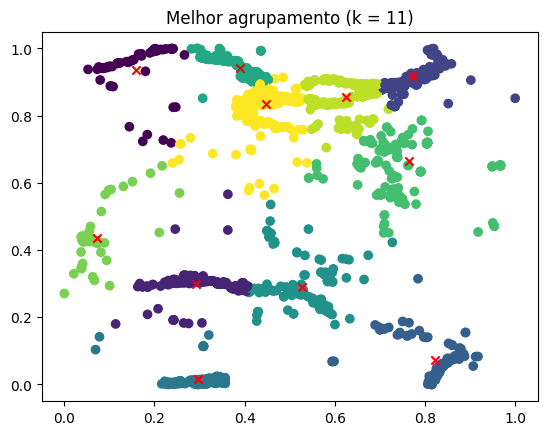

In [7]:
plt.scatter(data_normalized[:, 0], data_normalized[:, 1], c=best_kmeans.labels_, cmap='viridis')
plt.scatter(best_kmeans.cluster_centers_[:, 0], best_kmeans.cluster_centers_[:, 1], color='red', marker='x')
plt.title(f"Melhor agrupamento (k = {best_kmeans.n_clusters})")
plt.show()

##### letra b)

In [8]:
for k in k_values:
    scores = []
    for _ in range(20):
        kmeans = KMeans(n_clusters=k, n_init=20)
        kmeans.fit(data_normalized)
        distances = cdist(data_normalized, kmeans.cluster_centers_, 'mahalanobis')
        score = davies_bouldin_score(data_normalized, kmeans.labels_)
        scores.append(score)
    average_score = np.mean(scores)
    if average_score < best_score:
        best_score = average_score
        best_kmeans = kmeans

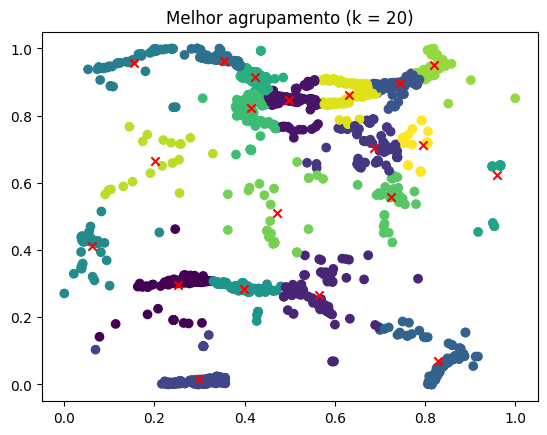

In [9]:
plt.scatter(data_normalized[:, 0], data_normalized[:, 1], c=best_kmeans.labels_, cmap='viridis')
plt.scatter(best_kmeans.cluster_centers_[:, 0], best_kmeans.cluster_centers_[:, 1], color='red', marker='x')
plt.title(f"Melhor agrupamento (k = {best_kmeans.n_clusters})")
plt.show()

#### Questão 2)

In [10]:
penguins = genfromtxt('/content/drive/MyDrive/AM/penguins.csv', delimiter = ',')

In [11]:
def normalize(data):
    data_normalized = (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))
    return data_normalized

In [12]:
data_normalized = normalize(penguins)

In [13]:
X = data_normalized[:, :-1]
y = data_normalized[:, -1]

##### letra a)

In [14]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

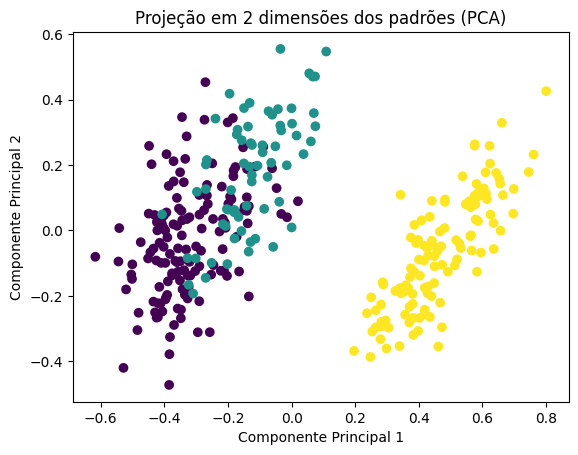

In [15]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Projeção em 2 dimensões dos padrões (PCA)')
plt.show()

##### letra b)

In [16]:
variance_explained = []
dimensions = [1, 2, 3, 4]

for n in dimensions:
    pca = PCA(n_components=n)
    pca.fit(X)
    variance_explained.append(np.sum(pca.explained_variance_ratio_))

In [17]:
for n, variance in zip(dimensions, variance_explained):
    print(f"Dimensão Projetada: {n}, Variância Explicada: {variance}")

Dimensão Projetada: 1, Variância Explicada: 0.6962662459329567
Dimensão Projetada: 2, Variância Explicada: 0.8879485511629696
Dimensão Projetada: 3, Variância Explicada: 0.971254283325752
Dimensão Projetada: 4, Variância Explicada: 0.9999999999999999
